# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Stanislaus Frans Bernado
- **Email:** stanislausfb@gmail.com
- **ID Dicoding:** stanislausfb

## Menentukan Pertanyaan Bisnis

- Pada musim apa terjadi jumlah rata-rata penyewaan sepeda terbanyak?
- Bagaimana tren jumlah penyewaan sepeda pada tahun 2011 hingga 2012?
- Bagaimana perbandingan antara jumlah penyewa kasual dan penyewa terdaftar di setiap tahunnya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Data Wrangling

### Gathering Data

In [2]:
hour_df = pd.read_csv('https://raw.githubusercontent.com/sfbernado/Bike-Sharing-Analysis/main/data/hour.csv')
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [3]:
day_df = pd.read_csv('https://raw.githubusercontent.com/sfbernado/Bike-Sharing-Analysis/main/data/day.csv')
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Assessing Data

#### Deskripsi Dataset


- instant: record index
- dteday : date
- season : season (1: Springer, 2: Summer, 3: Fall, 4: Winter)
- yr : year (0: 2011, 1: 2012)
- mnth : month (1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

#### Informasi Dataset **hour_df**

In [4]:
# Melihat informasi dataset
hour_df.info()
print("Dataset shape:", hour_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Dataset shape: (17379, 17)


Dataset **hour_df** terdiri dari 17379 record/baris dan 17 kolom. Selain itu, terdapat 3 macam tipe data pada dataset yaitu `float64`, `int64`, dan `object`.

In [5]:
# Memeriksa nilai yang hilang (missing values)
print('Missing value:')
hour_df.isna().sum()

Missing value:


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ditemukan nilai yang hilang atau *missing values* pada dataset **hour_df**

In [6]:
# Memeriksa duplikasi data
print('Duplicated data:', hour_df.duplicated().sum())

Duplicated data: 0


Tidak ditemukan duplikasi data pada dataset **hour_df**

In [7]:
# Melihat ringkasan statistik untuk kolom numerik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Informasi Dataset **day_df**

In [8]:
# Melihat informasi dataset
day_df.info()
print("Dataset shape:", day_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Dataset shape: (731, 16)


Dataset **day_df** terdiri dari 731 record/baris dan 16 kolom. Selain itu, terdapat 3 macam tipe data pada dataset yaitu `float64`, `int64`, dan `object`.

In [9]:
# Memeriksa nilai yang hilang (missing values)
print('Missing value:')
day_df.isna().sum()

Missing value:


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ditemukan nilai yang hilang atau *missing values* pada dataset **day_df**

In [10]:
# Memeriksa duplikasi data
print('Duplicated data:', day_df.duplicated().sum())

Duplicated data: 0


Tidak ditemukan duplikasi data pada dataset **day_df**

In [11]:
# Melihat ringkasan statistik untuk kolom numerik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

#### Membersihkan Dataset **hour_df**


In [12]:
# Mengganti nama kolom menjadi nama yang lebih mudah untuk dipahami
new_columns = {
    'instant': 'record_id',
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weekday': 'day',
    'workingday': 'days_category',
    'weathersit': 'weather',
    'temp': 'temperature',
    'atemp': 'temperature_feel',
    'hum': 'humidity',
    'casual': 'casual_users',
    'registered': 'registered_users',
    'cnt': 'total_users'
}

hour_df = hour_df.rename(columns = new_columns)
hour_df.head()

,record_id,date,season,year,month,hour,holiday,day,days_category,weather,temperature,temperature_feel,humidity,windspeed,casual_users,registered_users,total_users
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [13]:
# Menghapus kolom 'holiday', karena perannya sama dengan kolom 'workingday'
hour_df.drop(['holiday'], axis = 1, inplace = True)

In [14]:
# Mengubah tipe data pada kolom 'date' dari object menjadi datetime
hour_df['date'] = pd.to_datetime(hour_df['date'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   record_id         17379 non-null  int64         
 1   date              17379 non-null  datetime64[ns]
 2   season            17379 non-null  int64         
 3   year              17379 non-null  int64         
 4   month             17379 non-null  int64         
 5   hour              17379 non-null  int64         
 6   day               17379 non-null  int64         
 7   days_category     17379 non-null  int64         
 8   weather           17379 non-null  int64         
 9   temperature       17379 non-null  float64       
 10  temperature_feel  17379 non-null  float64       
 11  humidity          17379 non-null  float64       
 12  windspeed         17379 non-null  float64       
 13  casual_users      17379 non-null  int64         
 14  registered_users  1737

In [15]:
# Mengubah nilai pada kolom 'season' sesuai dengan deskripsi dataset
season = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

hour_df['season'] = hour_df['season'].map(season)
hour_df.head()

,record_id,date,season,year,month,hour,day,days_category,weather,temperature,temperature_feel,humidity,windspeed,casual_users,registered_users,total_users
0,1,2011-01-01,Spring,0,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
# Mengubah nilai pada kolom 'year', 'month', dan 'day' sesuai dengan kategori waktunya
hour_df['year'] = hour_df['date'].dt.year
hour_df['month'] = hour_df['date'].dt.month_name()
hour_df['day'] = hour_df['date'].dt.day_name()
hour_df.head()

,record_id,date,season,year,month,hour,day,days_category,weather,temperature,temperature_feel,humidity,windspeed,casual_users,registered_users,total_users
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [17]:
# Mengubah nilai pada kolom 'workingday' sesuai dengan kategorinya
day_categories = {
    0: 'Weekend/Holiday',
    1: 'Weekday'
}

hour_df['days_category'] = hour_df['days_category'].map(day_categories)
hour_df.head()

,record_id,date,season,year,month,hour,day,days_category,weather,temperature,temperature_feel,humidity,windspeed,casual_users,registered_users,total_users
0,1,2011-01-01,Spring,2011,January,0,Saturday,Weekend/Holiday,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,Saturday,Weekend/Holiday,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,Saturday,Weekend/Holiday,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,Saturday,Weekend/Holiday,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,Saturday,Weekend/Holiday,1,0.24,0.2879,0.75,0.0,0,1,1


In [18]:
# Mengubah nilai pada kolom 'weather' sesuai dengan deskripsi dataset
weather = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Rain',
    4: 'Heavy Rain'
}

hour_df['weather'] = hour_df['weather'].map(weather)
hour_df.head()

,record_id,date,season,year,month,hour,day,days_category,weather,temperature,temperature_feel,humidity,windspeed,casual_users,registered_users,total_users
0,1,2011-01-01,Spring,2011,January,0,Saturday,Weekend/Holiday,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,Saturday,Weekend/Holiday,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,Saturday,Weekend/Holiday,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,Saturday,Weekend/Holiday,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,Saturday,Weekend/Holiday,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [19]:
# Mengubah nilai pada kolom 'temperature', 'temperature_feel', 'humidity', dan 'windspeed' menjadi nilai yang belum dinormalisasikan
hour_df['temperature'] = hour_df['temperature'] * 41
hour_df['temperature_feel'] = hour_df['temperature_feel'] * 50
hour_df['humidity'] = hour_df['humidity'] * 100
hour_df['windspeed'] = hour_df['windspeed'] * 67
hour_df.head()

,record_id,date,season,year,month,hour,day,days_category,weather,temperature,temperature_feel,humidity,windspeed,casual_users,registered_users,total_users
0,1,2011-01-01,Spring,2011,January,0,Saturday,Weekend/Holiday,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,Saturday,Weekend/Holiday,Clear,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,Saturday,Weekend/Holiday,Clear,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,Saturday,Weekend/Holiday,Clear,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,Saturday,Weekend/Holiday,Clear,9.84,14.395,75.0,0.0,0,1,1


Setelah dilakukan beberapa pembersihan, ada baiknya dataset **hour_df** disimpan ke dalam dataset baru yang sudah siap untuk dianalisis.

In [20]:
# Menyimpan ke dalam dataset baru
hour_df.to_csv('cleaned_hour.csv', index = False)

#### Membersihkan Dataset **day_df**

In [21]:
# Mengganti nama kolom menjadi nama yang lebih mudah untuk dipahami
new_columns = {
    'instant': 'record_id',
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weekday': 'day',
    'workingday': 'days_category',
    'weathersit': 'weather',
    'temp': 'temperature',
    'atemp': 'temperature_feel',
    'hum': 'humidity',
    'casual': 'casual_users',
    'registered': 'registered_users',
    'cnt': 'total_users'
}

day_df = day_df.rename(columns = new_columns)
day_df.head()

,record_id,date,season,year,month,holiday,day,days_category,weather,temperature,temperature_feel,humidity,windspeed,casual_users,registered_users,total_users
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [22]:
# Menghapus kolom 'holiday', karena perannya sama dengan kolom 'workingday'
day_df.drop(['holiday'], axis = 1, inplace = True)

In [23]:
# Mengubah tipe data pada kolom 'date' dari object menjadi datetime
day_df['date'] = pd.to_datetime(day_df['date'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   record_id         731 non-null    int64         
 1   date              731 non-null    datetime64[ns]
 2   season            731 non-null    int64         
 3   year              731 non-null    int64         
 4   month             731 non-null    int64         
 5   day               731 non-null    int64         
 6   days_category     731 non-null    int64         
 7   weather           731 non-null    int64         
 8   temperature       731 non-null    float64       
 9   temperature_feel  731 non-null    float64       
 10  humidity          731 non-null    float64       
 11  windspeed         731 non-null    float64       
 12  casual_users      731 non-null    int64         
 13  registered_users  731 non-null    int64         
 14  total_users       731 non-

In [24]:
# Mengubah nilai pada kolom 'season' sesuai dengan deskripsi dataset
season = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

day_df['season'] = day_df['season'].map(season)
day_df.head()

,record_id,date,season,year,month,day,days_category,weather,temperature,temperature_feel,humidity,windspeed,casual_users,registered_users,total_users
0,1,2011-01-01,Spring,0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [25]:
# Mengubah nilai pada kolom 'year', 'month', dan 'day' sesuai dengan kategori waktunya
day_df['year'] = day_df['date'].dt.year
day_df['month'] = day_df['date'].dt.month_name()
day_df['day'] = day_df['date'].dt.day_name()
day_df.head()

,record_id,date,season,year,month,day,days_category,weather,temperature,temperature_feel,humidity,windspeed,casual_users,registered_users,total_users
0,1,2011-01-01,Spring,2011,January,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [26]:
# Mengubah nilai pada kolom 'workingday' sesuai dengan kategorinya
day_categories = {
    0: 'Weekend/Holiday',
    1: 'Weekday'
}

day_df['days_category'] = day_df['days_category'].map(day_categories)
day_df.head()

,record_id,date,season,year,month,day,days_category,weather,temperature,temperature_feel,humidity,windspeed,casual_users,registered_users,total_users
0,1,2011-01-01,Spring,2011,January,Saturday,Weekend/Holiday,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,Sunday,Weekend/Holiday,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,Monday,Weekday,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,Tuesday,Weekday,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,Wednesday,Weekday,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [27]:
# Mengubah nilai pada kolom 'weather' sesuai dengan deskripsi dataset
weather = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Rain',
    4: 'Heavy Rain'
}

day_df['weather'] = day_df['weather'].map(weather)
day_df.head()

,record_id,date,season,year,month,day,days_category,weather,temperature,temperature_feel,humidity,windspeed,casual_users,registered_users,total_users
0,1,2011-01-01,Spring,2011,January,Saturday,Weekend/Holiday,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,Sunday,Weekend/Holiday,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,Monday,Weekday,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,Tuesday,Weekday,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,Wednesday,Weekday,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [28]:
# Mengubah nilai pada kolom 'temperature', 'temperature_feel', 'humidity', dan 'windspeed' menjadi nilai yang belum dinormalisasikan
day_df['temperature'] = day_df['temperature'] * 41
day_df['temperature_feel'] = day_df['temperature_feel'] * 50
day_df['humidity'] = day_df['humidity'] * 100
day_df['windspeed'] = day_df['windspeed'] * 67
day_df.head()

,record_id,date,season,year,month,day,days_category,weather,temperature,temperature_feel,humidity,windspeed,casual_users,registered_users,total_users
0,1,2011-01-01,Spring,2011,January,Saturday,Weekend/Holiday,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,2011,January,Sunday,Weekend/Holiday,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,2011,January,Monday,Weekday,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,2011,January,Tuesday,Weekday,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,2011,January,Wednesday,Weekday,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Setelah dilakukan beberapa pembersihan, ada baiknya dataset **day_df** disimpan ke dalam dataset baru yang sudah siap untuk dianalisis.

In [29]:
# Menyimpan ke dalam dataset baru
day_df.to_csv('cleaned_day.csv', index = False)

## Exploratory Data Analysis (EDA)

### Explore Dataset **hour_df**

In [30]:
# Melihat kembali ringkasan statistik untuk kolom numerik
numeric_columns = [
    'temperature',
    'temperature_feel',
    'humidity',
    'windspeed',
    'casual_users',
    'registered_users',
    'total_users'
]
hour_df[numeric_columns].describe()

,temperature,temperature_feel,humidity,windspeed,casual_users,registered_users,total_users
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
std,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599
min,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


Berdasarkan ringkasan statistik, diperoleh informasi yaitu rata-rata sebanyak 189 penyewa akan menyewa sepeda per satu jam-nya.

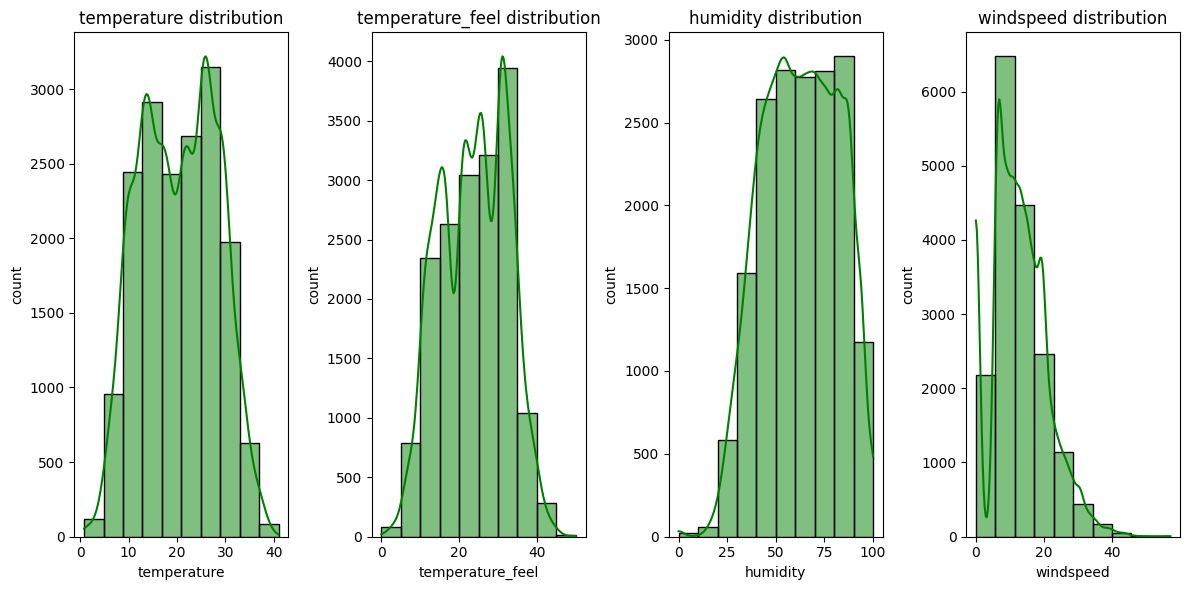

In [47]:
# Melihat persebaran data berdasarkan tingkat suhu (temperature), kelembaban (humidity), dan kecepatan angin (windspeed)
columns = ['temperature', 'temperature_feel', 'humidity', 'windspeed']

fig, axis = plt.subplots(nrows = 1, ncols = 4, figsize = (12, 6))

for i, ax in enumerate(axis):
  sns.histplot(x = hour_df[columns[i]], ax = ax, bins = 10, kde = True, color = 'green')
  ax.set_title(f'{columns[i]} distribution')
  ax.set_xlabel(f'{columns[i]}')
  ax.set_ylabel('count')

plt.tight_layout()

plt.show()

Berdasarkan grafik di atas, diperoleh informasi yaitu `temperature` dan `temperature_feel` menunjukkan distribusi normal (*normal distribution*). Di sisi lain, `humidity` menunjukkan distribusi kemiringan negatif (*left-skewed distribution*) dan `windspeed` menunjukkan distribusi kemiringan positif (*right-skewed distribution*)

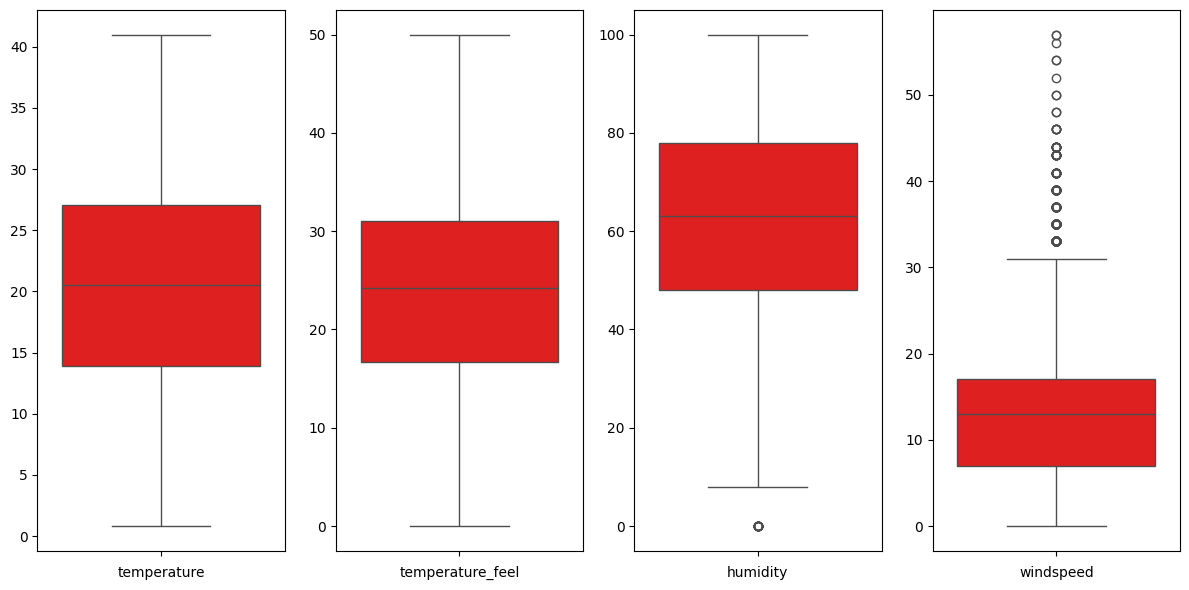

In [54]:
# Melihat outlier berdasarkan tingkat suhu (temperature), kelembaban (humidity), dan kecepatan angin (windspeed)
fig, axis = plt.subplots(nrows = 1, ncols = 4, figsize = (12, 6))

for i, ax in enumerate(axis):
  sns.boxplot(y = hour_df[columns[i]], ax = ax, orient = 'v', color = 'red')
  ax.set_xlabel(f'{columns[i]}')
  ax.set_ylabel('')

plt.tight_layout()

plt.show()

Berdasarkan grafik di atas, diperoleh informasi yaitu `temperature` dan `temperature_feel` tidak menunjukkan adanya *outlier*. Di sisi lain, `humidity` menunjukkan ada sedikit *outlier* dan `windspeed` menunjukkan ada banyak *outlier*.

In [50]:
# Melihat banyak penyewa per satu jam
hour_df.groupby(by = 'hour').agg({
    'casual_users': 'sum',
    'registered_users': 'sum',
    'total_users': ['max', 'min', 'mean', 'sum']
})

casual_users registered_users total_users                        
              sum              sum         max min        mean     sum
hour                                                                  
0            7375            31755         283   2   53.898072   39130
1            4709            19455         168   1   33.375691   24164
2            3412            12940         132   1   22.869930   16352
3            1893             6281          79   1   11.727403    8174
4             874             3554          28   1    6.352941    4428
5            1012            13249          66   1   19.889819   14261
6            3017            52115         213   1   76.044138   55132
7            8037           146134         596   1  212.064649  154171
8           15761           245240         839   5  359.011004  261001
9           22458           136980         426  14  219.309491  159438
10          33789            92468         539   8  173.668501  126257
11          43286           108034         663  10  208.143054  151320
12          49718           134696         776   3  253.315934  184414
13          52713           132206         760  11  253.661180  184919
14          55089           120563         750  12  240.949246  175652
15          54606           128543         750   7  251.233196  183149
16          53834           173914         783  11  311.983562  227748
17          54220           282640         976  15  461.452055  336860
18          44496           265276         977  23  425.510989  309772
19          35505           191284         743  11  311.523352  226789
20          26378           138172         567  11  226.030220  164550
21          20570           104875         584   6  172.314560  125445
22          16200            79412         502   9  131.335165   95612
23          11065            52876         256   2   87.831044   63941

Berdasarkan tabel di atas, diperoleh informasi yaitu penyewaan sepeda paling banyak terjadi pada pukul 17.00 hingga 17.59 dengan total sebanyak 336860 penyewa, sedangkan penyewaan sepeda paling sedikit terjadi pada pukul 04.00 hingga 04.59 dengan total sebanyak 4428 penyewa.

### Explore Dataset **day_df**

In [55]:
# Melihat kembali ringkasan statistik untuk kolom numerik
numeric_columns = [
    'temperature',
    'temperature_feel',
    'humidity',
    'windspeed',
    'casual_users',
    'registered_users',
    'total_users'
]
day_df[numeric_columns].describe()

,temperature,temperature_feel,humidity,windspeed,casual_users,registered_users,total_users
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Berdasarkan ringkasan statistik, diperoleh informasi yaitu rata-rata sebanyak 4504 penyewa akan menyewa sepeda per hari-nya.

In [87]:
# Melihat banyak penyewa per satu hari
result = day_df.groupby(by='day').agg({
    'casual_users': 'sum',
    'registered_users': 'sum',
    'total_users': ['max', 'min', 'mean', 'sum']
})

result_sorted = result.sort_values(by=('total_users', 'sum'), ascending=False)
result_sorted

casual_users registered_users total_users                           
                   sum              sum         max   min         mean     sum
day                                                                           
Friday           78238           409552        8362  1167  4690.288462  487790
Thursday         61460           423935        7804   431  4667.259615  485395
Saturday        153852           323955        8714   627  4550.542857  477807
Wednesday        57319           415729        8173   441  4548.538462  473048
Tuesday          57843           411266        7767   683  4510.663462  469109
Monday           70784           384719        7525    22  4338.123810  455503
Sunday          140521           303506        8227   605  4228.828571  444027

Berdasarkan tabel di atas, diperoleh informasi yaitu penyewaan sepeda paling banyak terjadi pada hari Jumat (*Friday*) dengan total sebanyak 487790 penyewa, sedangkan penyewaan sepeda paling sedikit terjadi pada hari Minggu (*Sunday*) dengan total sebanyak 444027 penyewa.

In [71]:
# Melihat banyak penyewa di setiap musim
day_df.groupby(by = 'season')['total_users'].sum().sort_values(ascending = False).reset_index()

,season,total_users
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


Berdasarkan tabel di atas, diperoleh informasi yaitu penyewaan sepeda paling banyak terjadi pada musim gugur (*Fall*) dengan total sebanyak 1061129 kali sewa, sedangkan penyewaan sepeda paling sedikit terjadi pada musim semi (*Spring*) dengan total sebanyak 471348 kali sewa.

In [85]:
# Melihat banyak penyewa bulanan dan tahunan
day_df.groupby(by = ['year', 'month']).agg({
    'casual_users': 'sum',
    'registered_users': 'sum',
    'total_users': ['max', 'min', 'mean', 'sum']
})

casual_users registered_users total_users                     \
                        sum              sum         max   min         mean   
year month                                                                    
2011 April            22346            72524        5312   795  3162.333333   
     August           28842           107849        5895  1115  4409.387097   
     December          8448            78875        3940   705  2816.870968   
     February          6242            41973        2927  1005  1721.964286   
     January           3073            35116        1985   431  1231.903226   
     July             36452           104889        6043  3285  4559.387097   
     June             30612           112900        5515  3767  4783.733333   
     March            12826            51219        3239   605  2065.967742   
     May              31050           104771        5805  2633  4381.322581   
     November         15594            86573        4486  1495  3405.566667   
     October          25222            98289        5511   627  3984.225806   
     September        26545           100873        5423  1842  4247.266667   
2012 April            38456           135768        7460  1027  5807.466667   
     August           43197           171306        7865  4549  6919.451613   
     December         13245           110468        6606   441  3990.741935   
     February          8721            94416        5062  1529  3556.448276   
     January           8969            87775        4521  1301  3120.774194   
     July             41705           161902        8173  4459  6567.967742   
     June             43294           159536        8120  4127  6761.000000   
     March            31618           133257        8362  3194  5318.548387   
     May              44235           151630        8294  2843  6318.225806   
     November         21009           131655        6852  2277  5088.800000   
     October          34538           164303        8156    22  6414.225806   
     September        43778           174795        8714  4073  7285.766667   

                        
                   sum  
year month              
2011 April       94870  
     August     136691  
     December    87323  
     February    48215  
     January     38189  
     July       141341  
     June       143512  
     March       64045  
     May        135821  
     November   102167  
     October    123511  
     September  127418  
2012 April      174224  
     August     214503  
     December   123713  
     February   103137  
     January     96744  
     July       203607  
     June       202830  
     March      164875  
     May        195865  
     November   152664  
     October    198841  
     September  218573

Berdasarkan tabel di atas, diperoleh informasi bahwa pada tahun 2011, penyewaan sepeda paling banyak terjadi pada bulan Juni (*June*) dengan total sebanyak 143512 penyewa. Di sisi lain, pada tahun 2012, penyewaan sepeda paling banyak terjadi pada bulan September (*September*) dengan total sebanyak 218573 penyewa.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa terjadi jumlah rata-rata penyewaan sepeda terbanyak?

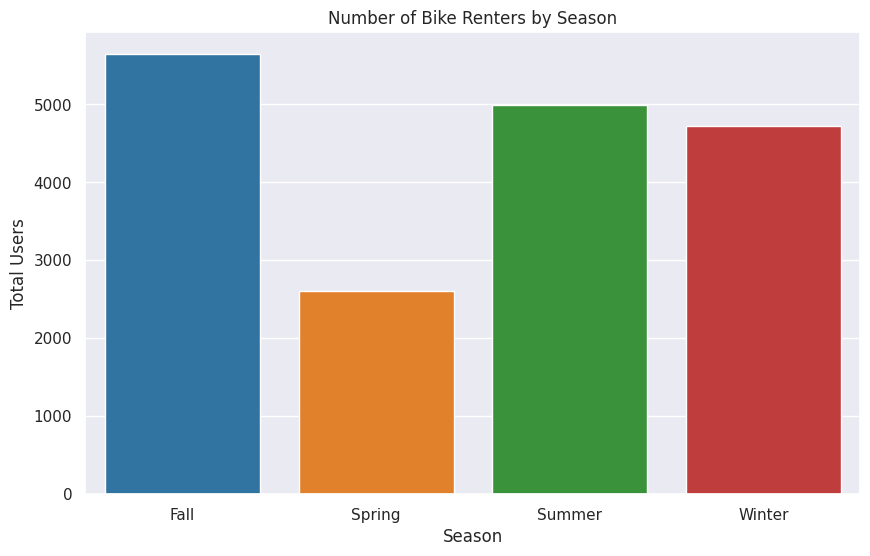

In [118]:
seasonal_df = day_df.groupby(by = 'season').agg({
    'casual_users': 'mean',
    'registered_users': 'mean',
    'total_users': 'mean'
})

plt.figure(figsize=(10,6))

sns.barplot(data = seasonal_df, x = 'season', y = 'total_users', hue = 'season', palette = 'tab10', legend = False)
plt.xlabel('Season')
plt.ylabel('Total Users')
plt.title('Average Number of Bike Renters by Season')

plt.show()

Berdasarkan grafik di atas, diketahui bahwa rata-rata jumlah penyewaan sepeda terbanyak terjadi pada musim gugur (*Fall*).

### Pertanyaan 2: Bagaimana tren jumlah penyewaan sepeda pada tahun 2011 hingga 2012?

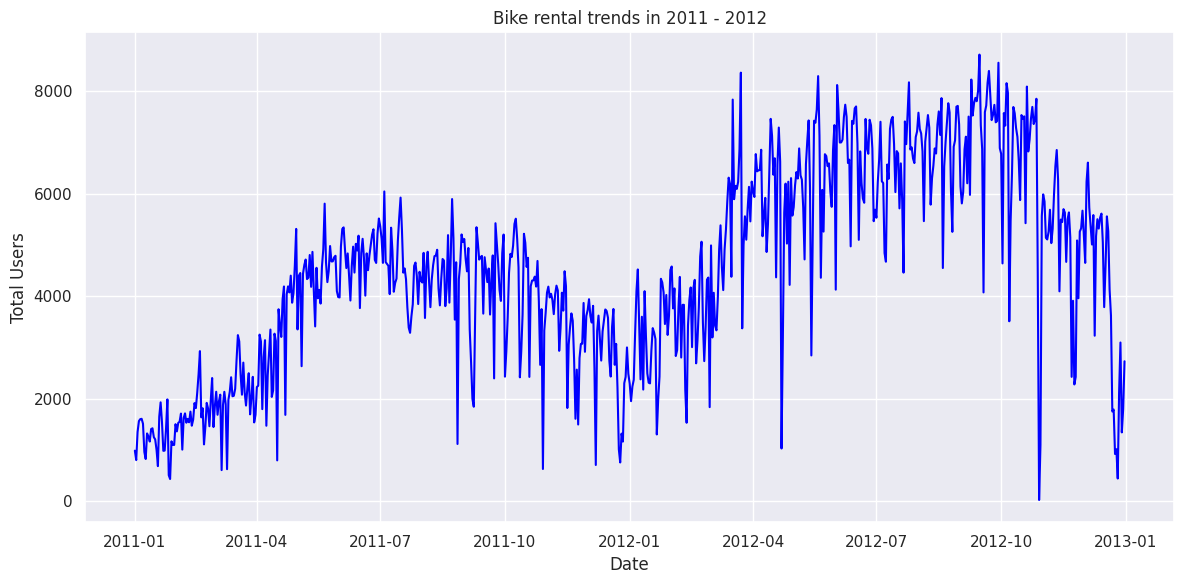

In [122]:
plt.figure(figsize=(12,6))

sns.lineplot(data = day_df, x = 'date', y = 'total_users', color = 'blue')

plt.xlabel("Date")
plt.ylabel("Total Users")
plt.title("Bike rental trends in 2011 - 2012")

plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, terjadi peningkatan jumlah penyewaan sepeda pada tahun 2012.

### Pertanyaan 3: Bagaimana perbandingan antara jumlah penyewa kasual dan penyewa terdaftar di setiap tahunnya?

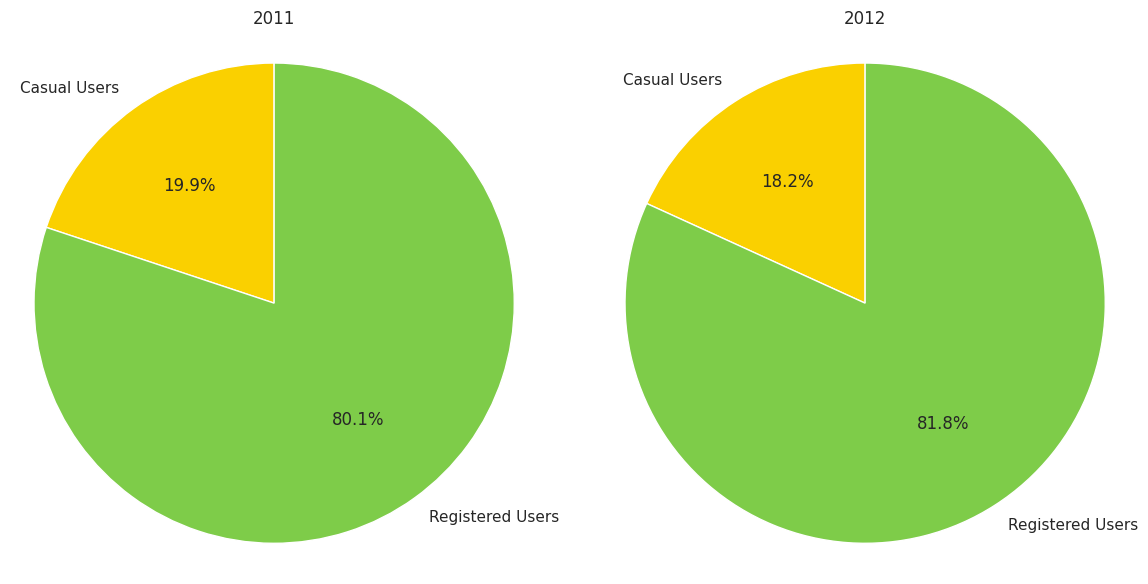

In [127]:
yearly_df = day_df.groupby('year').agg({
    'casual_users': 'sum',
    'registered_users': 'sum'
})

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

labels = ['Casual Users', 'Registered Users']
colors = ['#FAD000', '#7ECC49']

for i, (year, data) in enumerate(yearly_df.iterrows()):
    axs[i].pie(data, labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 90)
    axs[i].set_title(f'{year}')
    axs[i].axis('equal')

plt.tight_layout()

plt.show()

Berdasarkan grafik di atas, pada tahun 2011 perbandingan antara penyewa kasual dan penyewa terdaftar adalah 19,9% banding 80,1%. Sedangkan pada tahun 2012 perbandingan antara penyewa kasual dan penyewa terdaftar adalah 18,2% banding 81,8%.

## Conclusion

- Conclution pertanyaan 1: Berdasarkan informasi yang telah didapatkan, dapat disimpulkan bahwa rata-rata jumlah penyewaan sepeda terbanyak terjadi pada musim gugur (*Fall*). Di sisi lain, musim semi (*Spring*) menjadi musim dengan rata-rata jumlah penyewaan sepeda terdikit.
- Conclution pertanyaan 2: Berdasarkan informasi yang telah didapatkan, dapat disimpulkan bahwa terjadi peningkatan jumlah penyewaan sepeda pada tahun 2012. Dapat dilihat juga bahwa jumlah penyewaan sepeda lebih banyak terjadi dari bulan April hingga bulan Oktober di setiap tahunnya.
- Conclution pernyataan 3: Berdasarkan informasi yang telah didapatkan, dapat disimpulkan bahwa pada tahun 2011 perbandingan antara penyewa kasual dan penyewa terdaftar adalah 19,9% banding 80,1%. Di sisi lain, pada tahun 2012 perbandingan antara penyewa kasual dan penyewa terdaftar adalah 18,2% banding 81,8%. Dari perbandingan tersebut juga dapat diketahui bahwa terjadi peningkatan penyewa terdaftar dari tahun 2011 ke tahun 2012 sebesar 1,7%.

## Teknik Analisis Lanjutan

### RFM Analysis

In [134]:
rfm_df = day_df.groupby('day', as_index = False).agg({
    'date': 'max',
    'record_id': 'nunique',
    'total_users': 'sum'
})

rfm_df.columns = ['day', 'max_order_timestamp', 'frequency', 'monetary']

rfm_df['max_order_timestamp'] = rfm_df['max_order_timestamp'].dt.date
recent_date = day_df['date'].dt.date.max()
rfm_df['recency'] = rfm_df['max_order_timestamp'].apply(lambda x: (recent_date - x).days)
rfm_df.drop('max_order_timestamp', axis = 1, inplace = True)

rfm_df

,day,frequency,monetary,recency
0,Friday,104,487790,3
1,Monday,105,455503,0
2,Saturday,105,477807,2
3,Sunday,105,444027,1
4,Thursday,104,485395,4
5,Tuesday,104,469109,6
6,Wednesday,104,473048,5


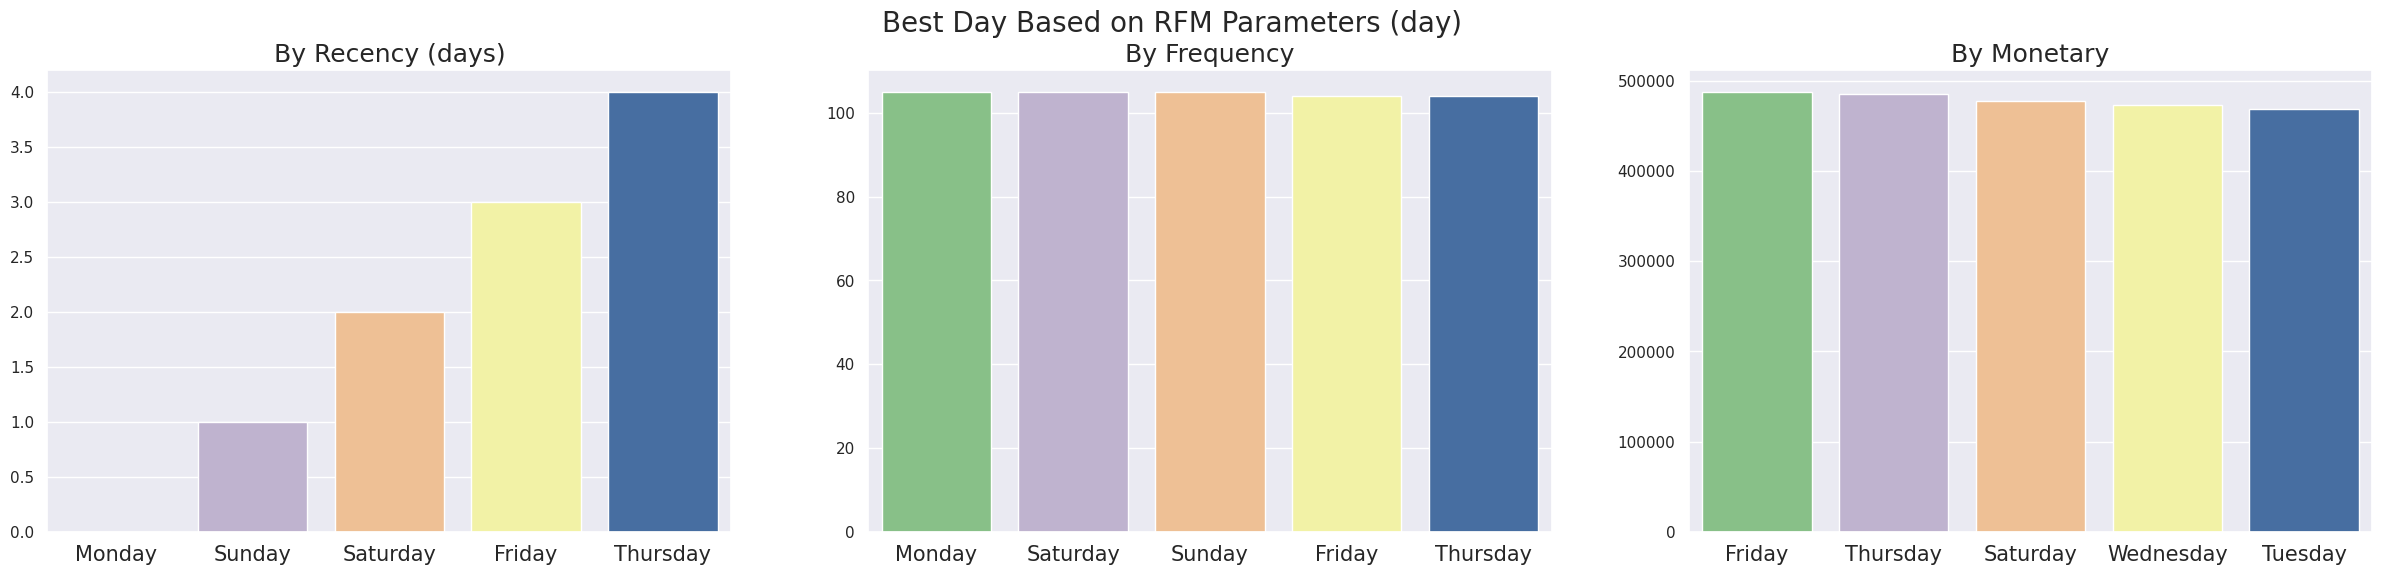

In [138]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

sns.barplot(y = 'recency', x = 'day', data = rfm_df.sort_values(by = 'recency', ascending = True).head(5), palette = 'Accent', hue = 'day', legend = False, ax = ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('By Recency (days)', loc = 'center', fontsize = 18)
ax[0].tick_params(axis = 'x', labelsize = 15)

sns.barplot(y = 'frequency', x = 'day', data = rfm_df.sort_values(by = 'frequency', ascending = False).head(5), palette = 'Accent', hue = 'day', legend = False, ax = ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title('By Frequency', loc = 'center', fontsize = 18)
ax[1].tick_params(axis = 'x', labelsize = 15)

sns.barplot(y = 'monetary', x = 'day', data = rfm_df.sort_values(by = 'monetary', ascending = False).head(5), palette = 'Accent', hue = 'day', legend = False, ax = ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title('By Monetary', loc = 'center', fontsize = 18)
ax[2].tick_params(axis = 'x', labelsize = 15)

plt.suptitle('Best Day Based on RFM Parameters (day)', fontsize = 20)
plt.show()